### Dataset 2 - Wine

This dataset is related to red and white vinho verde wine samples, from the north of Portugal. 
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

#### Problem 
The goal is to model wine quality based on physicochemical tests. Based on the input data from 11 features of chemical properties, an output quality score from 0 to 10 is assigned to each instance. We would formulate this in terms of a regression problem where we attempt to arrive at a quality rating based on input chemical data.

#### Extending the problem
If we could somehow get measures of wines from outside of this dataset would could come up with an interesting and useful regression based algorithm. Additionally, the dataset gives an integer rating while our algorithm arrives at a decimal rating. Maybe this set could be more useful with classification? Or in the future, a decimal rating system for wines would be better. 

### Dataset Description

This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
Please include this citation if you plan to use this database:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
            [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
            [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib
            
In the above reference, two datasets were created, using red and white wine samples.
The inputs include objective tests (e.g. PH values) and the output is based on sensory data
(median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
these datasets under a regression approach. The support vector machine model achieved the
best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
analysis procedure).

Number of Instances: red wine - 1599; white wine - 4898. 

Number of Attributes: 11 + output attribute
  
Note: several of the attributes may be correlated, thus it makes sense to apply some sort of feature selection.

Attribute information:

For more information, read [Cortez et al., 2009].

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data): 
12 - quality (score between 0 and 10)

### Loading the Dataset
This dataset is stored between two .csv files for red and white wines. We first need to extract this data into a workable format.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

red_filedata = np.genfromtxt('./data/Wine/winequality-red.csv', delimiter=';', skip_header=1)
white_filedata = np.genfromtxt('./data/Wine/winequality-white.csv', delimiter=';', skip_header=1)

# Transpose so that features are along the rows and data points are along the columns
red_filedata = red_filedata.transpose()
white_filedata = white_filedata.transpose()

# Extract the targets and separate into vector
red_targets = red_filedata[11:,:]
red_data = red_filedata[:11,:]
white_targets = white_filedata[11:,:]
white_data = white_filedata[:11,:]

# Dataset is now split and ready for analysis
print (red_data.shape)
print (red_targets.shape)
print (white_data.shape)
print (white_targets.shape)

(11, 1599)
(1, 1599)
(11, 4898)
(1, 4898)


### Analysing our Cleaned Data

This dataset required very minimal adjustment, thanks to numpy. For this dataset, our goal is to fit a regression models off of the various chemical features described above, and arrive at some overall quality score for each wine. The targets are given by the data set, and we can attempt to arrive at these using our regression models.
These are the 3 methods that will be used, along with the group member responsible for that method:
- Linear Regression - Brooks Tawil
- Principal Component Analysis Regression - Jack Chiu
- Regression Method 3 - Gavin Mckim

### Linear Regression - Brooks Tawil

Linear regression is a simple and easy regression method that can be used here. Across our 11 features we can fit a regression model. We will be doing this for both the red and white wine datasets. For linear regression it follows that:

Useful link: https://medium.com/@andrew.chamberlain/the-linear-algebra-view-of-least-squares-regression-f67044b7f39b

We first need to find our weights using the derived equation:

${\dot{w} = (X^TX)^{-1}X^T Y}$

Where Y is our target values and X is our feature matrix

In [2]:
# Append a row of 1s for our linear regression
red_X = np.append(red_data, np.ones((red_data.shape[1], 1)).transpose(), axis=0).T
red_Y = np.array(red_targets).T

white_X = np.append(white_data, np.ones((white_data.shape[1], 1)).transpose(), axis=0).T
white_Y = np.array(white_targets).T

Setting up the k-folds cross validation involves segmenting our data into folds. I selected k=16 as that would allow for 100 values in each fold, a nice even number.

In [3]:
# Will run a k-folds cross validation with k=16, giving folds of 100 values each
k = 16
white_errors = []
red_errors = []
white_w_s = []
red_w_s = []
count = 0

# Allocate space for our folds and targets
white_folds = [[] for _ in range(k)]
white_targets = [[] for _ in range(k)]
red_folds = [[] for _ in range(k)]
red_targets = [[] for _ in range(k)]

# Assign indices to the data for shuffling
white_indices = []
red_indices = []
for i in range(len(white_X)):
    white_indices.append(i)
for i in range(len(red_X)):
    red_indices.append(i)
import random
random.shuffle(white_indices)
random.shuffle(red_indices)

# Split the data and targets into seperate blocks
for index in white_indices:    
    white_folds[count].append(white_X[index])
    white_targets[count].append(white_Y[index])
    count += 1
    if(count == k):
        count = 0
count = 0
for index in red_indices:    
    red_folds[count].append(red_X[index])
    red_targets[count].append(red_Y[index])
    count += 1
    if(count == k):
        count = 0

# Makes use of the Moore Penrose Inverse https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse

The data is now split into folds and can be used to fit linear models. We will first do so for the white wine dataset.

In [4]:
# Go through the folds of white wine data, form training and testing sets, fit a model, and calculate the error
for i in range(len(white_folds)):
    # Separate training_set
    training_set = []
    training_targets = []
    for j in range(len(white_folds)):
        if(i != j):
            for l in range(len(white_folds[j])):
                training_set.append(white_folds[j][l])
                training_targets.append(white_targets[j][l])
      
    # From the test_set
    test_set = np.array(white_folds[i])
    test_targets = np.array(white_targets[i])
    training_set = np.array(training_set)
    training_targets = np.array(training_targets)
    
    # Run the LS regression on the training sets to get a w
    w = np.linalg.inv(training_set.T @ training_set) @ training_set.T @ training_targets
    
    # Use the found w to calculate y' on the test set
    yHat = test_set @ w
    
    # Calculate the LS error 
    sumSquare = 0.0
    for j in range(len(test_set)):
        sumSquare += float(np.square(np.subtract(test_targets[i], yHat[i])))
    sumSquare = sumSquare/len(test_set)
        
    print ('Test Set ' + str(i) + ' Error: ' + str(sumSquare))
    white_errors.append(sumSquare)
    
    white_w_s.append(w)
    
print ('Errors: ' + str(white_errors))
print ('Average regression error: \t' + str(np.mean(white_errors)))

# Get the w that gives the smallest error
minError = np.inf
minError_index = 0
for i in range(len(white_errors)):
    if white_errors[i] < minError:
        minError = white_errors[i]
        minError_index = i

white_w_s = np.array(white_w_s) 
white_best_w = white_w_s[minError_index]

Test Set 0 Error: 0.29811209572011427
Test Set 1 Error: 0.8358515185069262
Test Set 2 Error: 0.1303641235309429
Test Set 3 Error: 2.122072546890266
Test Set 4 Error: 0.5469244950902519
Test Set 5 Error: 0.18658226759811875
Test Set 6 Error: 0.2629664779650567
Test Set 7 Error: 0.037648399289180325
Test Set 8 Error: 1.790508900793157
Test Set 9 Error: 0.495659157583513
Test Set 10 Error: 0.0446822290244525
Test Set 11 Error: 0.7006164194159793
Test Set 12 Error: 1.7853137016142733
Test Set 13 Error: 0.018069755982752768
Test Set 14 Error: 0.03676555856395195
Test Set 15 Error: 0.8553334144045559
Errors: [0.29811209572011427, 0.8358515185069262, 0.1303641235309429, 2.122072546890266, 0.5469244950902519, 0.18658226759811875, 0.2629664779650567, 0.037648399289180325, 1.790508900793157, 0.495659157583513, 0.0446822290244525, 0.7006164194159793, 1.7853137016142733, 0.018069755982752768, 0.03676555856395195, 0.8553334144045559]
Average regression error: 	0.6342169413733432


After running our cross validation, we have arrived at a weight vector $w$ that has been fit to our data. This w will now be used against the whole dataset so that we can report the regression error across the whole dataset.

In [5]:
# With the best w, run across the whole set like before and find the error
# Use the found w to calculate y' on the test set
yHat = white_X @ white_best_w

# Caluculate error using the best w
sumSquare = 0
for i in range(len(yHat)):
    sumSquare += np.square(np.subtract(yHat[i], white_Y[i]))
sumSquare = sumSquare/len(yHat)

print ('Weights: \n', white_best_w)
print ('Mean error using best w: ' + str(sumSquare))
print ()

Weights: 
 [[ 7.30882518e-02]
 [-1.85130962e+00]
 [-1.07288726e-02]
 [ 8.20931638e-02]
 [-2.24230407e-01]
 [ 4.00069149e-03]
 [-1.98067781e-04]
 [-1.46978346e+02]
 [ 7.30634527e-01]
 [ 6.02202581e-01]
 [ 2.03197479e-01]
 [ 1.46606879e+02]]
Mean error using best w: [0.56337622]



C:\Users\jackc\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned


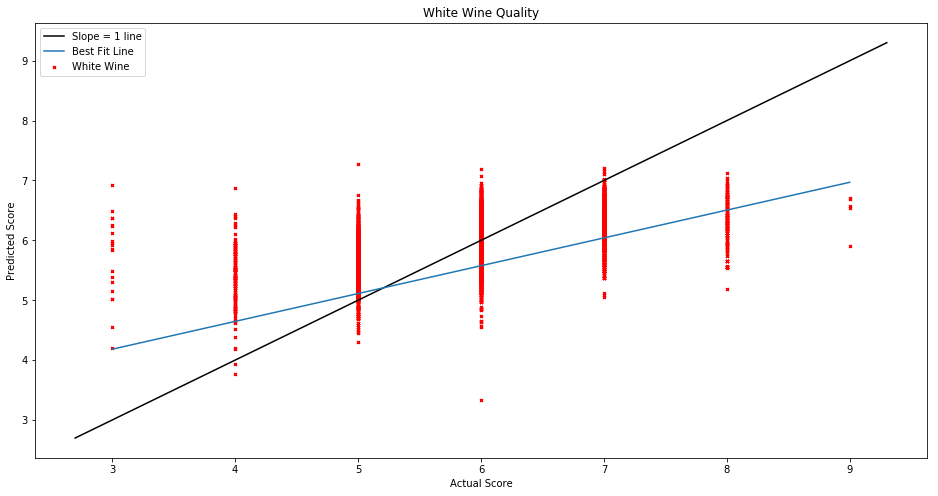

In [6]:
# Graph Sample Number vs. Score
# yHat is the Predicted
# white_Y is the Measured
x_axis = range(len(yHat))

# Plot of the white wine data
plt.figure(figsize=(16, 8))
ax = plt.axes()
plt.title('White Wine Quality')
plt.scatter(white_Y, yHat, s=8, color='r', marker='x')
# Print straight line
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
lower = min([ymin,xmin])
upper = max([ymax, xmax])
ax.plot( [lower, upper] , [lower, upper], 'k-')

# Plot best fit line
plt.plot(np.unique(white_Y), np.poly1d(np.polyfit(white_Y[0,:], yHat[0,:], 1))(np.unique(white_Y)))

plt.legend(['Slope = 1 line', 'Best Fit Line', 'White Wine'])
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

And now on the Red Wine set

In [7]:
# Go through the folds of red wine data, form training and testing sets, fit a model, and calculate the error
for i in range(len(red_folds)):
    # Separate training_set
    training_set = []
    training_targets = []
    for j in range(len(red_folds)):
        if(i != j):
            for l in range(len(red_folds[j])):
                training_set.append(red_folds[j][l])
                training_targets.append(red_targets[j][l])
      
    # From the test_set
    test_set = np.array(red_folds[i])
    test_targets = np.array(red_targets[i])
    training_set = np.array(training_set)
    training_targets = np.array(training_targets)
    
    # Run the LS regression on the training sets to get a w
    w = np.linalg.inv(training_set.T @ training_set) @ training_set.T @ training_targets
    
    # Use the found w to calculate y' on the test set
    yHat = test_set @ w
    
    # Calculate the LS error 
    sumSquare = 0.0
    for j in range(len(test_set)):
        sumSquare += float(np.square(np.subtract(test_targets[i], yHat[i])))
    sumSquare = sumSquare/len(test_set)
        
    print ('Test Set ' + str(i) + ' Error: ' + str(sumSquare))
    red_errors.append(sumSquare)
    
    red_w_s.append(w)
    
print ('Errors: ' + str(red_errors))
print ('Average regression error: \t' + str(np.mean(red_errors)))

# Get the w that gives the smallest error
minError = np.inf
minError_index = 0
for i in range(len(red_errors)):
    if red_errors[i] < minError:
        minError = red_errors[i]
        minError_index = i

red_w_s = np.array(red_w_s) 
red_best_w = red_w_s[minError_index]

# With the best w, run across the whole set like before and find the error
# Use the found w to calculate y' on the test set
yHat = red_X @ red_best_w

# Caluculate error using the best w
sumSquare = 0
for i in range(len(yHat)):
    sumSquare += np.square(np.subtract(yHat[i], red_Y[i]))
sumSquare = sumSquare/len(yHat)

print ('Weights: \n', red_best_w)
print ('Mean error using best w: ' + str(sumSquare))
print ()

Test Set 0 Error: 0.02884119255250152
Test Set 1 Error: 1.2978997655262845
Test Set 2 Error: 0.12433670049048884
Test Set 3 Error: 1.3805187571639683
Test Set 4 Error: 0.41618039493566783
Test Set 5 Error: 0.14086704861494723
Test Set 6 Error: 0.08170906946915933
Test Set 7 Error: 2.0142116281236238
Test Set 8 Error: 0.5810440496246783
Test Set 9 Error: 0.08564891951190406
Test Set 10 Error: 0.020443568941162
Test Set 11 Error: 0.1928093710557231
Test Set 12 Error: 0.10804565291101655
Test Set 13 Error: 0.0016962924613096097
Test Set 14 Error: 1.1535640302538892
Test Set 15 Error: 0.10693294069752034
Errors: [0.02884119255250152, 1.2978997655262845, 0.12433670049048884, 1.3805187571639683, 0.41618039493566783, 0.14086704861494723, 0.08170906946915933, 2.0142116281236238, 0.5810440496246783, 0.08564891951190406, 0.020443568941162, 0.1928093710557231, 0.10804565291101655, 0.0016962924613096097, 1.1535640302538892, 0.10693294069752034]
Average regression error: 	0.48342183639586533
Weight

C:\Users\jackc\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RankWarning: Polyfit may be poorly conditioned


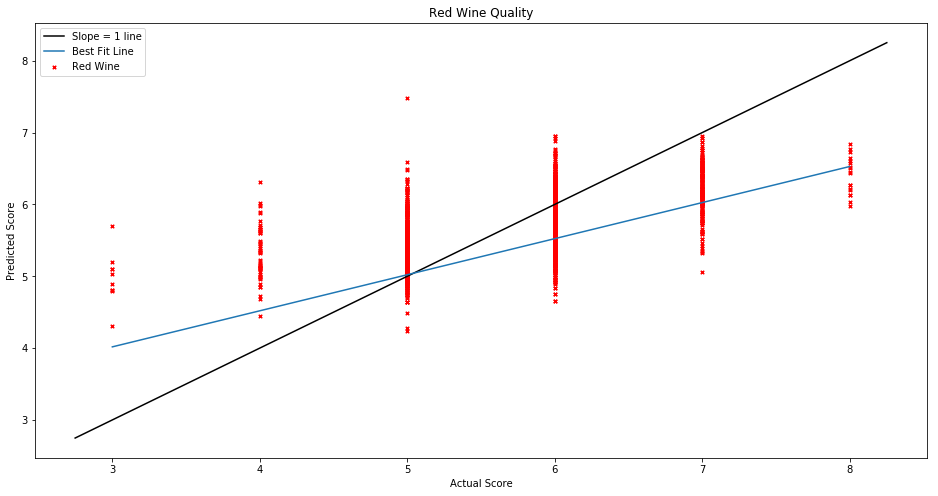

In [8]:
# Graph Sample Number vs. Score
# yHat is the Predicted
# red_Y is the Measured
x_axis = range(len(yHat))

# Plot of the white wine data
plt.figure(figsize=(16, 8))
ax = plt.axes()

plt.title('Red Wine Quality')
plt.scatter(red_Y, yHat, s=12, color='r', marker='x')
# Print straight line m=1
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
lower = min([ymin,xmin])
upper = max([ymax, xmax])
ax.plot( [lower, upper] , [lower, upper], 'k-')

# Plot best fit line
plt.plot(np.unique(red_Y), np.poly1d(np.polyfit(red_Y[0,:], yHat[0,:], 1))(np.unique(red_Y)))

plt.legend(['Slope = 1 line', 'Best Fit Line', 'Red Wine'])
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

### Conclusions

For both the white wine and red wine sets, it appears that a strict linear regression will shy away from the extremes and tend to more heavily favor classifying with scores of 5, 6, and 7. This doesn't necessarily make for the worst regression error, but it fails at correctly arriving at quality scores for the exceptionally bad, and the exceptionally good wines.

Ideally we would want our best fit line to match a the black line with a 1:1 slope in this 'Actual vs. Predicted' visualization. This would mean a given prediction would closely match the actual value.

Linear Regression is simple, and delivers a mean regression error of around 0.563(White) and 0.4169(Red), which is not particularly bad when you think about the variance that can be associated by humans rating things. But it fails to find the standouts and outliers. Those wines that show either an unmatched quality, or one you would definitely try and stay away from.

# Principal Components Analysis Regression


In [9]:
def pca(data, labels, kFeat = 3):
    inds = np.random.choice(np.arange(len(data[0])), len(data[0]))
    data[:] = data[:,inds]
    labels[0,:] = labels[0,inds]
    
    m = np.mean(data,1)    
    m = m.reshape(len(m),1)
#    print(m)
    if kFeat >= len(m):
        kFeat = len(m)
    data = data-m
    covX = np.cov(data)
    vals, vects = np.linalg.eig(covX)
    inds = vals.argsort()[::-1]
    labels = labels.T
    U = vects[:,inds[0]].reshape(len(data),1)
    if kFeat > 1:
        for i in range(kFeat-1):
            temp = vects[:,inds[i]].reshape(len(m),1)
            U = np.concatenate((U, temp), axis = 1)
    
    W = np.matmul(data.T, U)    
    W = np.concatenate((W,np.ones((W.shape[0],1))),axis = 1)
    gamma = np.linalg.pinv(np.matmul(W.T,W))
    gamma = np.matmul(gamma, W.T)
    gamma = np.matmul(gamma, labels)
    
    return U.T, gamma
    
def calcAcc(trainingData, trainingLabels, testData, testLabels, kFeat = 3):
    U, gamma = pca(trainingData, trainingLabels, kFeat)
    predictedList = []
    err = 0
    for i in range(testData.shape[1]):
        sample = np.matmul(U, testData[:,i])
        sample = np.append(sample,[1])
        predicted = np.matmul(sample,gamma)
        predictedList.append(predicted)
        err += abs(predicted - testLabels[0,i])
    err /= testData.shape[1]    
    
    return err, predictedList
    

def kFold(data, labels, typeWine, kFeat = 5, kFolds = 5):
    #shuffle
    inds = np.random.choice(np.arange(data.shape[1]), data.shape[1])
    data[:] = data[:,inds]
    labels[:] = labels[:,inds]
    typeWine = typeWine[inds]

    startInd = 0
    stepSize = int(data.shape[1]/kFolds)
    Errs = []
    predictions = []
    for i in range(kFolds):
        if i != kFolds-1:
            testData = data[:, startInd:startInd+stepSize]
            testLabels = labels[:, startInd:startInd+stepSize]
            trainingData = data[:, :startInd]
            trainingData = np.concatenate((trainingData, data[:, startInd+stepSize:]), axis = 1)
            trainingLabels = labels[:, :startInd]
            trainingLabels = np.concatenate((trainingLabels,labels[:, startInd+stepSize:]), axis = 1)
        else:
            testData = data[:, startInd:]
            testLabels = labels[:, startInd:]
            trainingData = data[:, :startInd]
            trainingLabels = labels[:, :startInd]

        startInd += stepSize
        
        temp, pList = calcAcc(trainingData, trainingLabels, testData, testLabels, kFeat = kFeat)
        predictions.extend(pList)
        Errs.append(temp)
    
    return Errs, predictions, labels, typeWine


The above is the creation of the regression model based on PCA. The n chosen principal components are produced by extracting the top n features. Since there are 11 features, we choose 11 features to fully represent the data. In the PCA portion, the data is centered about the means then classic PCA is run on the data to produce matrix U to reduce the feature vector of each data sample to the desired dimensions. Then, vector $\gamma$ is generated in the style of linear regression by $$\gamma = (W^T W)^{-1}W^T Y$$ where $W = XU$. This is done so regression can be done on samples by the following relation:
$$Y_{predicted} = W_{sample}\gamma $$ with $W$ being the feature extracted result of the sample $ W = X_{sample}U$. Ultimately, these predictions can be compared with the actual quality values of the wines.

Testing this regression model on the red and white wines combined with number of features = 11 and 5 folds for k-fold cross validation yields the following results

(11, 6497)
(1, 1599)
(1, 4898)
0.0 11.542149175435277


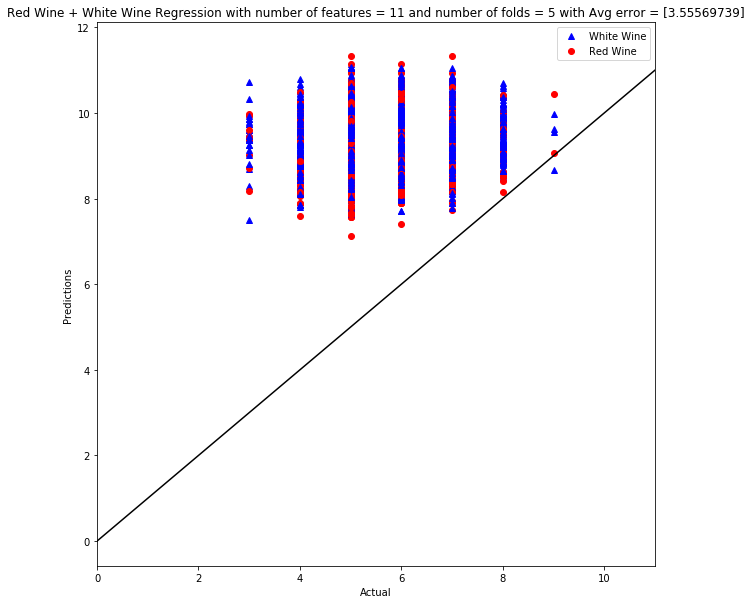

In [19]:
data = np.concatenate((red_data, white_data),axis = 1)
print(data.shape)
print(red_targets.shape)
print(white_targets.shape)
labels = np.concatenate((red_targets, white_targets),axis = 1)
typeWine = ['r' for i in range(red_data.shape[1])]
typeWine.extend(['w' for i in range(white_data.shape[1])])
typeWine = np.array(typeWine)

kFeats = 11
kF = 5
err, predictions, actual, typeWine = kFold(data, labels, typeWine, kFeat = kFeats, kFolds = kF)
avgErr = sum(err)/len(err)

fig, ax = plt.subplots(1,1,figsize = (10,10))
for i in range(len(predictions)):
    if typeWine[i] == 'r':
        ax.plot( actual[0,i],predictions[i], 'ro')
    elif typeWine[i] == 'w':
        ax.plot( actual[0,i],predictions[i], 'b^')
ax.set_title('Red Wine + White Wine Regression'+ ' with number of features = '+ str(kFeats) + ' and number of folds = ' + str(kF) + ' with Avg error = ' + str(avgErr))
ax.set_ylabel('Predictions')
ax.set_xlabel('Actual')
ax.set_xlim([0,11])
if typeWine[0] == 'r':
    ax.legend(['Red Wine', 'White Wine'])
else:
    ax.legend(['White Wine','Red Wine'])
    
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
lower = min([ymin,xmin])
upper = max([ymax, xmax])
print(lower, upper)
ax.plot( [lower, upper] , [lower, upper], 'k-')

Likewise, running the regression model on only the white wine with the same number of features and number of folds for k-fold cross validation yields:

0.0 11.444656821646598


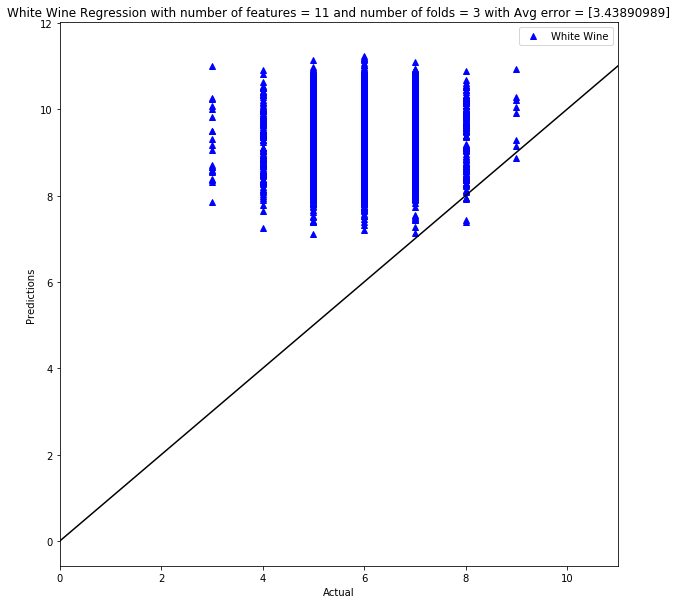

In [17]:
data = white_data
labels = white_targets

typeWine = ['w' for i in range(white_data.shape[1])]
typeWine = np.array(typeWine)

kFeats = 11
kF = 3
err, predictions, actual, typeWine = kFold(data, labels, typeWine, kFeat = kFeats, kFolds = kF)
avgErr = sum(err)/len(err)

fig, ax = plt.subplots(1,1,figsize = (10,10))
for i in range(len(predictions)):
    if typeWine[i] == 'r':
        ax.plot( actual[0,i],predictions[i], 'ro')
    elif typeWine[i] == 'w':
        ax.plot( actual[0,i],predictions[i], 'b^')
ax.set_title('White Wine Regression'+ ' with number of features = '+ str(kFeats) + ' and number of folds = ' + str(kF) + ' with Avg error = ' + str(avgErr))
ax.set_ylabel('Predictions')
ax.set_xlabel('Actual')
ax.set_xlim([0,11])
ax.legend(['White Wine'])
    
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
lower = min([ymin,xmin])
upper = max([ymax, xmax])
print(lower, upper)
ax.plot( [lower, upper] , [lower, upper], 'k-')

Finally, running the model on red wine only yields:

0.0 11.0


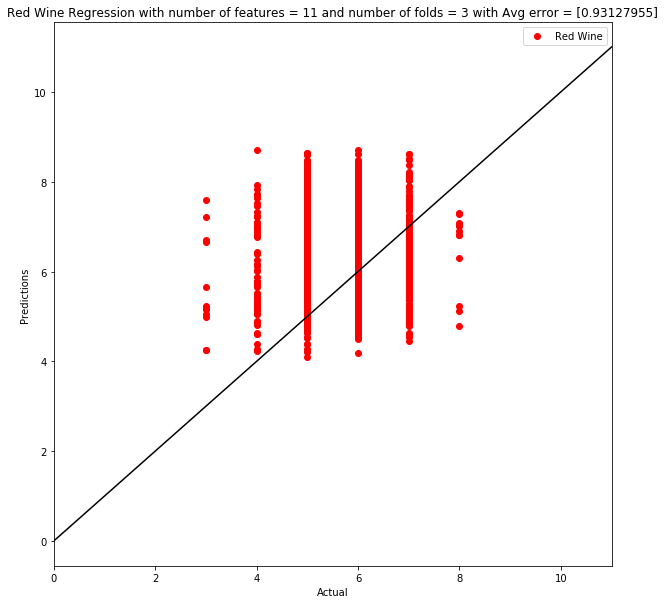

In [18]:
data = red_data
labels = red_targets

typeWine = ['r' for i in range(red_data.shape[1])]
typeWine = np.array(typeWine)

kFeats = 11
kF = 3
err, predictions, actual, typeWine = kFold(data, labels, typeWine, kFeat = kFeats, kFolds = kF)
avgErr = sum(err)/len(err)

fig, ax = plt.subplots(1,1,figsize = (10,10))
for i in range(len(predictions)):
    if typeWine[i] == 'r':
        ax.plot( actual[0,i],predictions[i], 'ro')
    elif typeWine[i] == 'w':
        ax.plot( actual[0,i],predictions[i], 'b^')
ax.set_title('Red Wine Regression'+ ' with number of features = '+ str(kFeats) + ' and number of folds = ' + str(kF) + ' with Avg error = ' + str(avgErr))
ax.set_ylabel('Predictions')
ax.set_xlabel('Actual')
ax.set_xlim([0,11])
ax.legend(['Red Wine'])
    
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
lower = min([ymin,xmin])
upper = max([ymax, xmax])
print(lower, upper)
ax.plot( [lower, upper] , [lower, upper], 'k-')

Evidently, the data provided of the different aspects of the wine does not appear to have too much correlation with quality. According to the regression model generated by using PCA feature extraction, the predictions tend to be centered around a quality score of 6 with disregard to the actual quality score. Checking to see whether decreasing the number of features used yields the following plot

0.0 11.0


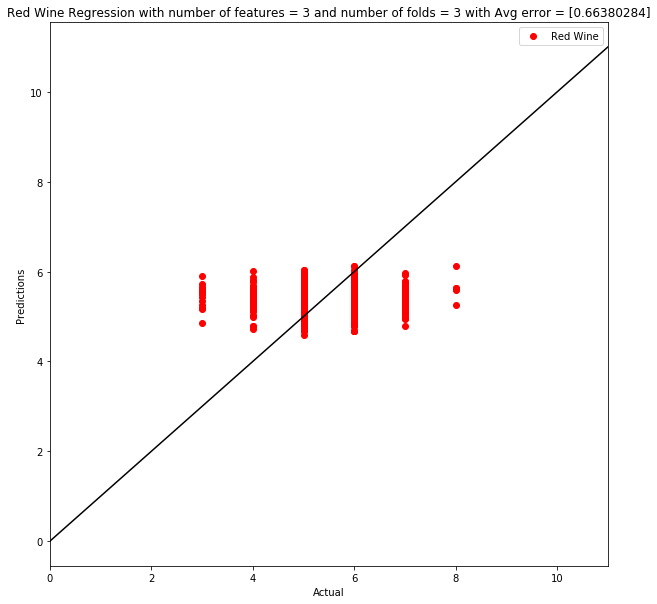

In [20]:
data = red_data
labels = red_targets

typeWine = ['r' for i in range(red_data.shape[1])]
typeWine = np.array(typeWine)

kFeats = 3
kF = 3
err, predictions, actual, typeWine = kFold(data, labels, typeWine, kFeat = kFeats, kFolds = kF)
avgErr = sum(err)/len(err)

fig, ax = plt.subplots(1,1,figsize = (10,10))
for i in range(len(predictions)):
    if typeWine[i] == 'r':
        ax.plot( actual[0,i],predictions[i], 'ro')
    elif typeWine[i] == 'w':
        ax.plot( actual[0,i],predictions[i], 'b^')
ax.set_title('Red Wine Regression'+ ' with number of features = '+ str(kFeats) + ' and number of folds = ' + str(kF) + ' with Avg error = ' + str(avgErr))
ax.set_ylabel('Predictions')
ax.set_xlabel('Actual')
ax.set_xlim([0,11])
ax.legend(['Red Wine'])
    
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
lower = min([ymin,xmin])
upper = max([ymax, xmax])
print(lower, upper)
ax.plot( [lower, upper] , [lower, upper], 'k-')

When using less amount of features, the same predictive quality score tends to center around 5.75 across the board with disregard to the actual quality of the wine. This implies that the tests of the actual composition of the wines may have some relation to the quality of the wine but not necessarily. According to experts, quality of wines tend to rely on these four traits: <br>
(1) smell of the wine <br>
(2) balance of acidity, tannin, alcohol, and fruit <br>
(3) Depth of flavor <br>
(4) How long the flavor lasts on your palate after swallowing <br>
https://www.quickanddirtytips.com/house-home/entertaining/wine/4-ways-to-know-if-your-wine-is-good\\ <br>
<br> 
The data provided to describe the wines are purely quantitive, which should allow for reproducible results. However, my prediction is that the quality is
The main focus is to relate quantitative data to qualitative result. The issue here lies in the quality of the wine being based on experts' tastes. That being said, certain combinations may allow for better feel. Ultimately, there may exist a correlation, but linear regression based on features does not allow for proper prediction of quality of wines.